In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset
!unzip gender-classification-dataset.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Directory paths
train_dir = 'Training'
val_dir = 'Validation'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history=model.fit(train_generator, epochs=10, validation_data=val_generator)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Epoch 1/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7891 - loss: 0.3960 - val_accuracy: 0.9433 - val_loss: 0.1496
Epoch 2/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9428 - loss: 0.1542 - val_accuracy: 0.9575 - val_loss: 0.1161
Epoch 3/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9518 - loss: 0.1337 - val_accuracy: 0.9594 - val_loss: 0.1091
Epoch 4/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9588 - loss: 0.1126 - val_accuracy: 0.9607 - val_loss: 0.1037
Epoch 5/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.9628 - loss: 0.1068 - val_accuracy: 0.9616 - val_loss: 0.1027
Epoch 6/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9640 - loss: 0.0970 - val_accuracy: 0.9624 - val_loss: 0.1058
Epoch 7/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9699 - loss: 0.0850 - val_accuracy: 0.9602 - val_los

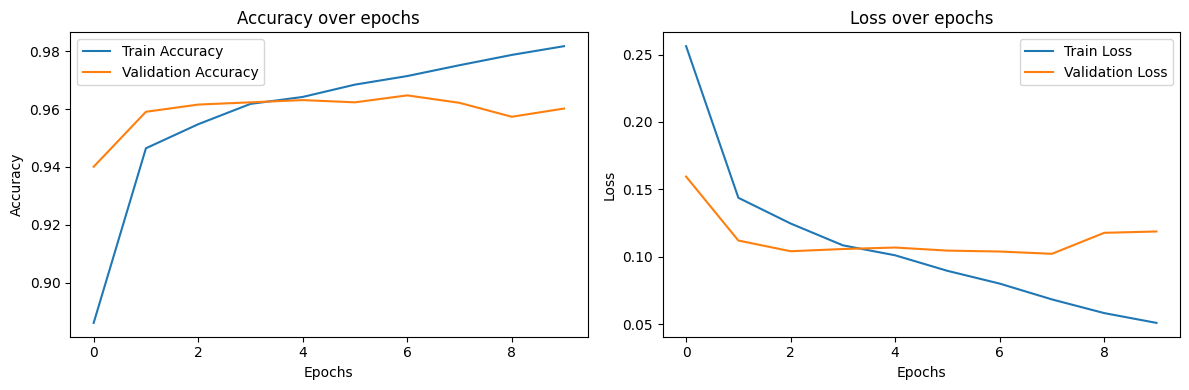

In [3]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
model.save("model.h5")

In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model_path = 'model.h5'
model = load_model(model_path)

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Predict the gender using the model
def predict_gender(image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    prediction=prediction[0][0]
    if prediction>0.5:
      predicted_label="Male"
    else:
      predicted_label="Female"
      prediction=1-prediction
    print(f'The gender is {predicted_label} with confidence {prediction}')

image_path = 'girl.jpeg'
predicted_gender = predict_gender(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
The gender is Male with confidence 0.9989456534385681
